<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/PCA_%26LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('/content/sample_data/diabetes.csv')

In [16]:
X = df.drop('label', axis=1)
y = df['label']

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

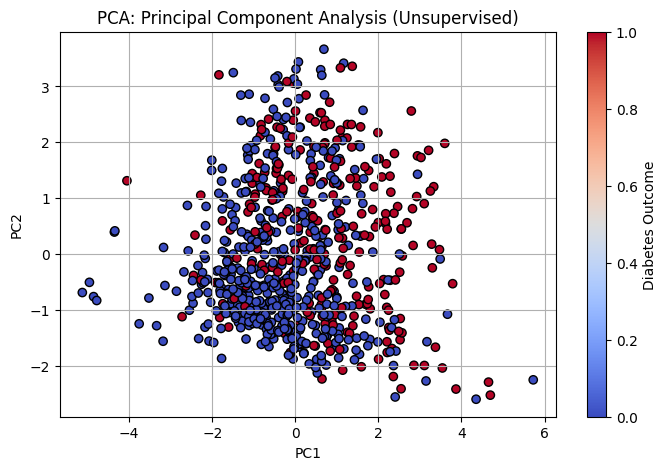

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('PCA: Principal Component Analysis (Unsupervised)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Diabetes Outcome')
plt.grid(True)
plt.show()


In [20]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

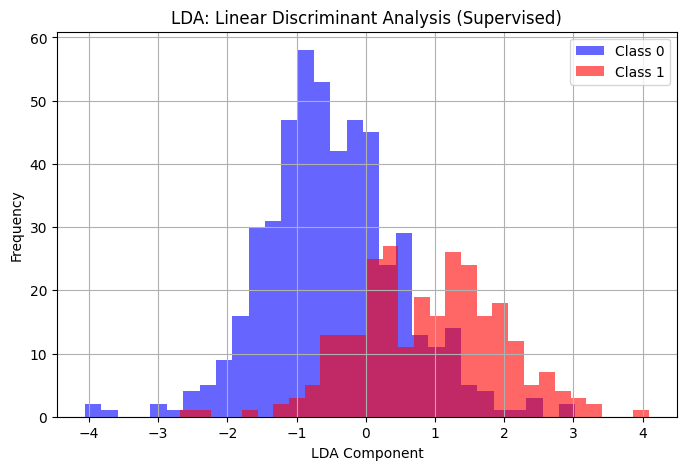

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(X_lda[y == 0], alpha=0.6, label='Class 0', bins=30, color='blue')
plt.hist(X_lda[y == 1], alpha=0.6, label='Class 1', bins=30, color='red')
plt.title('LDA: Linear Discriminant Analysis (Supervised)')
plt.xlabel('LDA Component')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

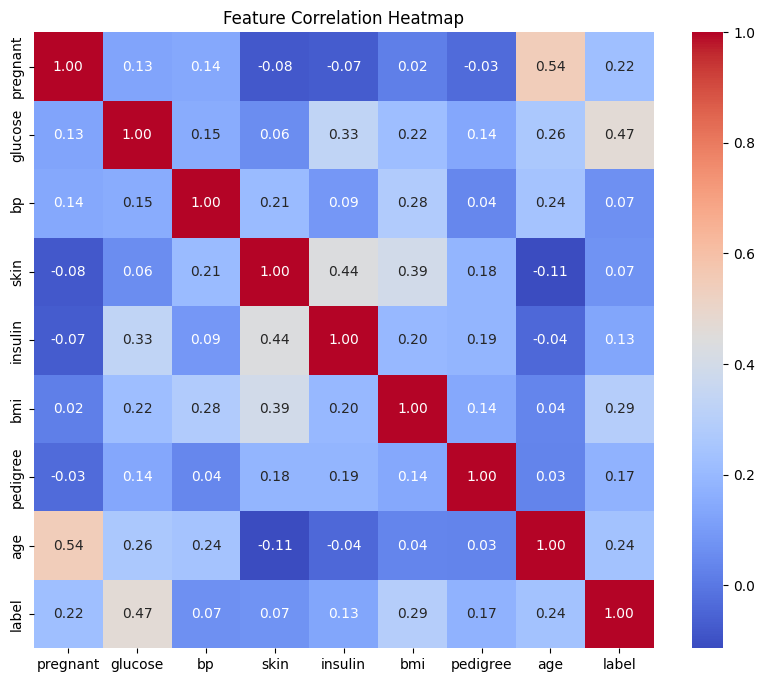

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

<ipython-input-24-1090751709>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


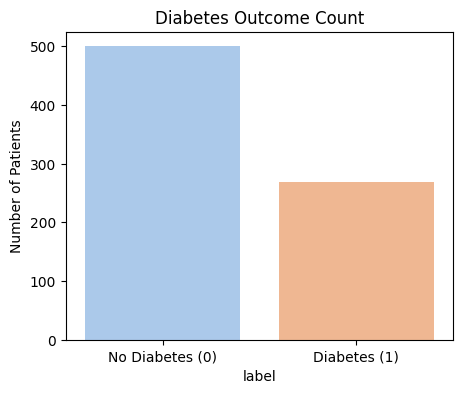

In [24]:
plt.figure(figsize=(5, 4))
sns.countplot(x='label', data=df, palette='pastel')
plt.title('Diabetes Outcome Count')
plt.xticks([0, 1], ['No Diabetes (0)', 'Diabetes (1)'])
plt.ylabel('Number of Patients')
plt.show()

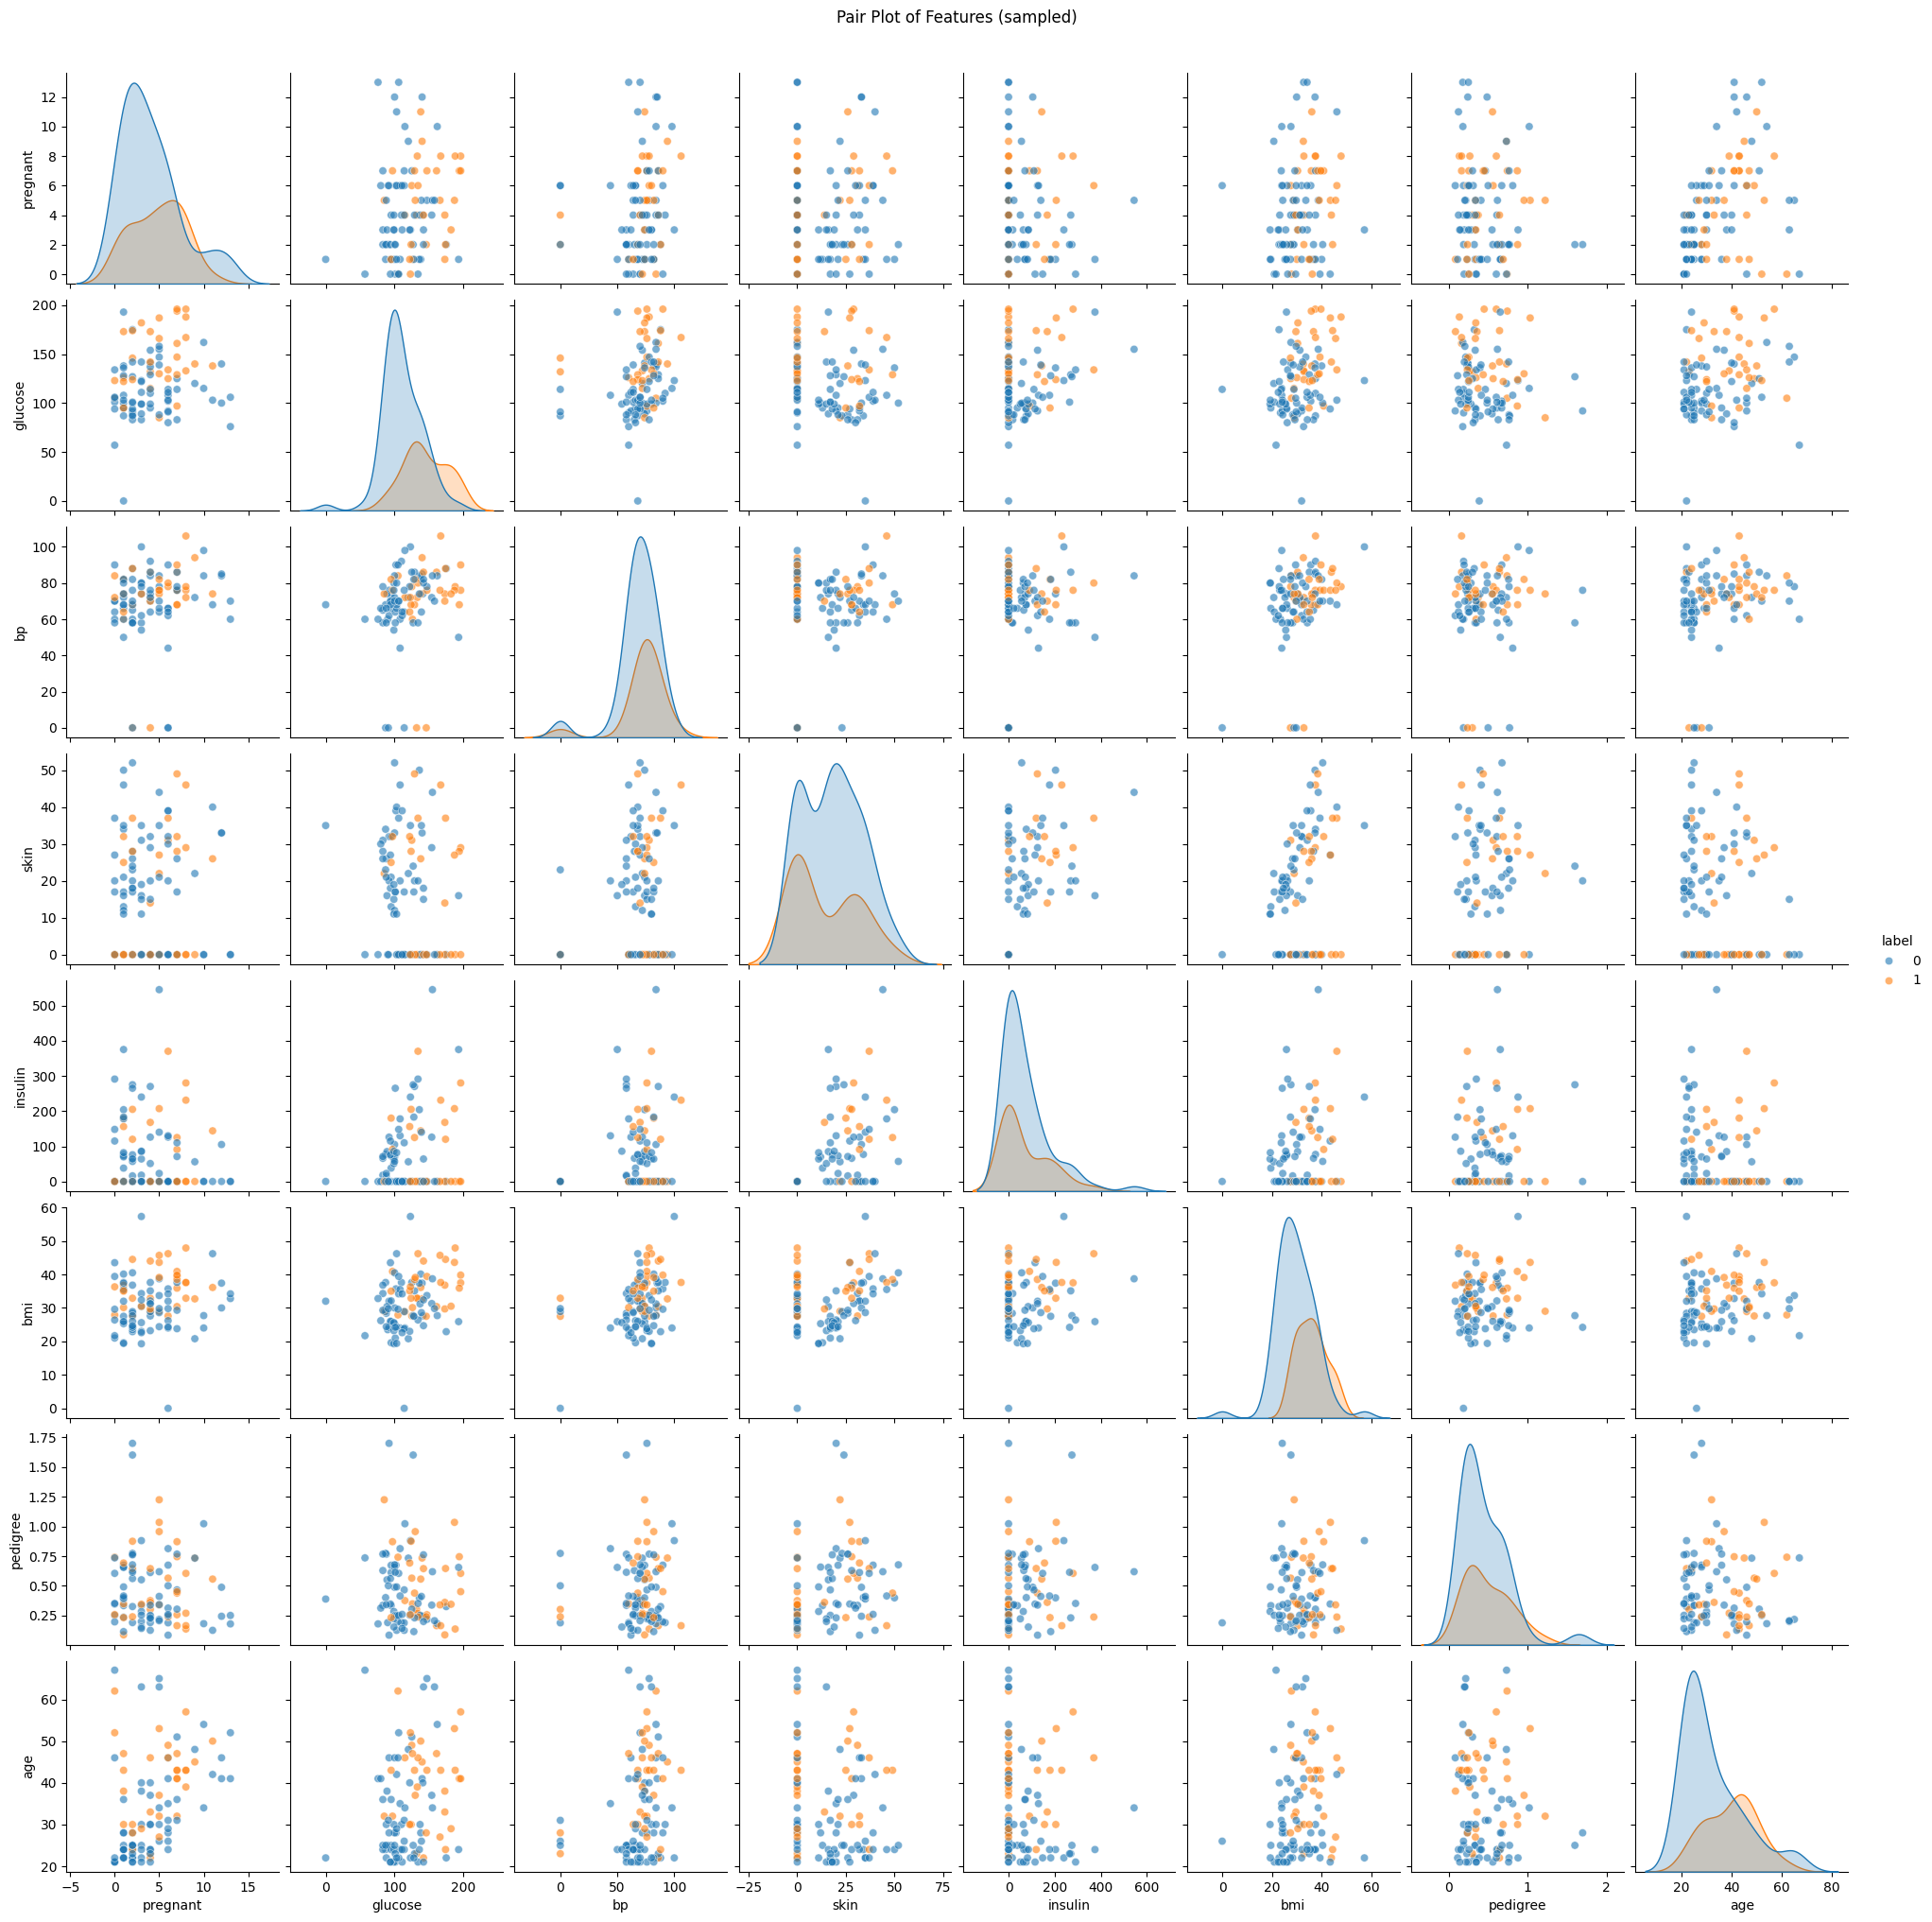

In [27]:
sns.pairplot(df.sample(100), hue='label', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Features (sampled)', y=1.02)
plt.show()

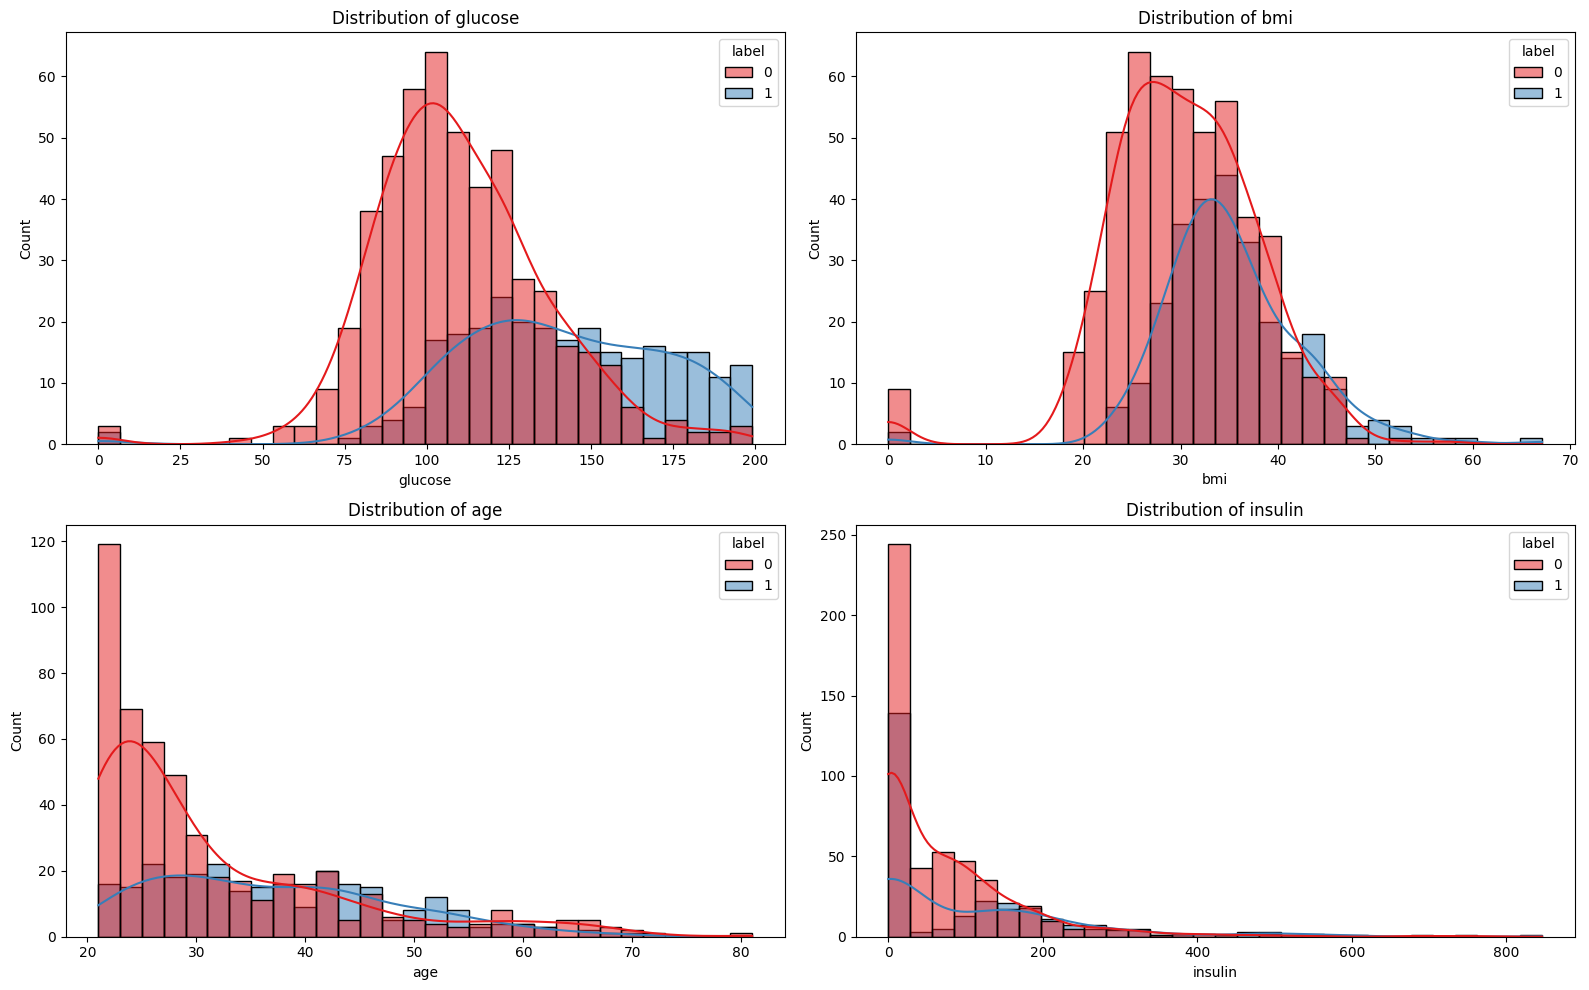

In [32]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(['glucose', 'bmi', 'age', 'insulin']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=col, hue='label', kde=True, palette='Set1', bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

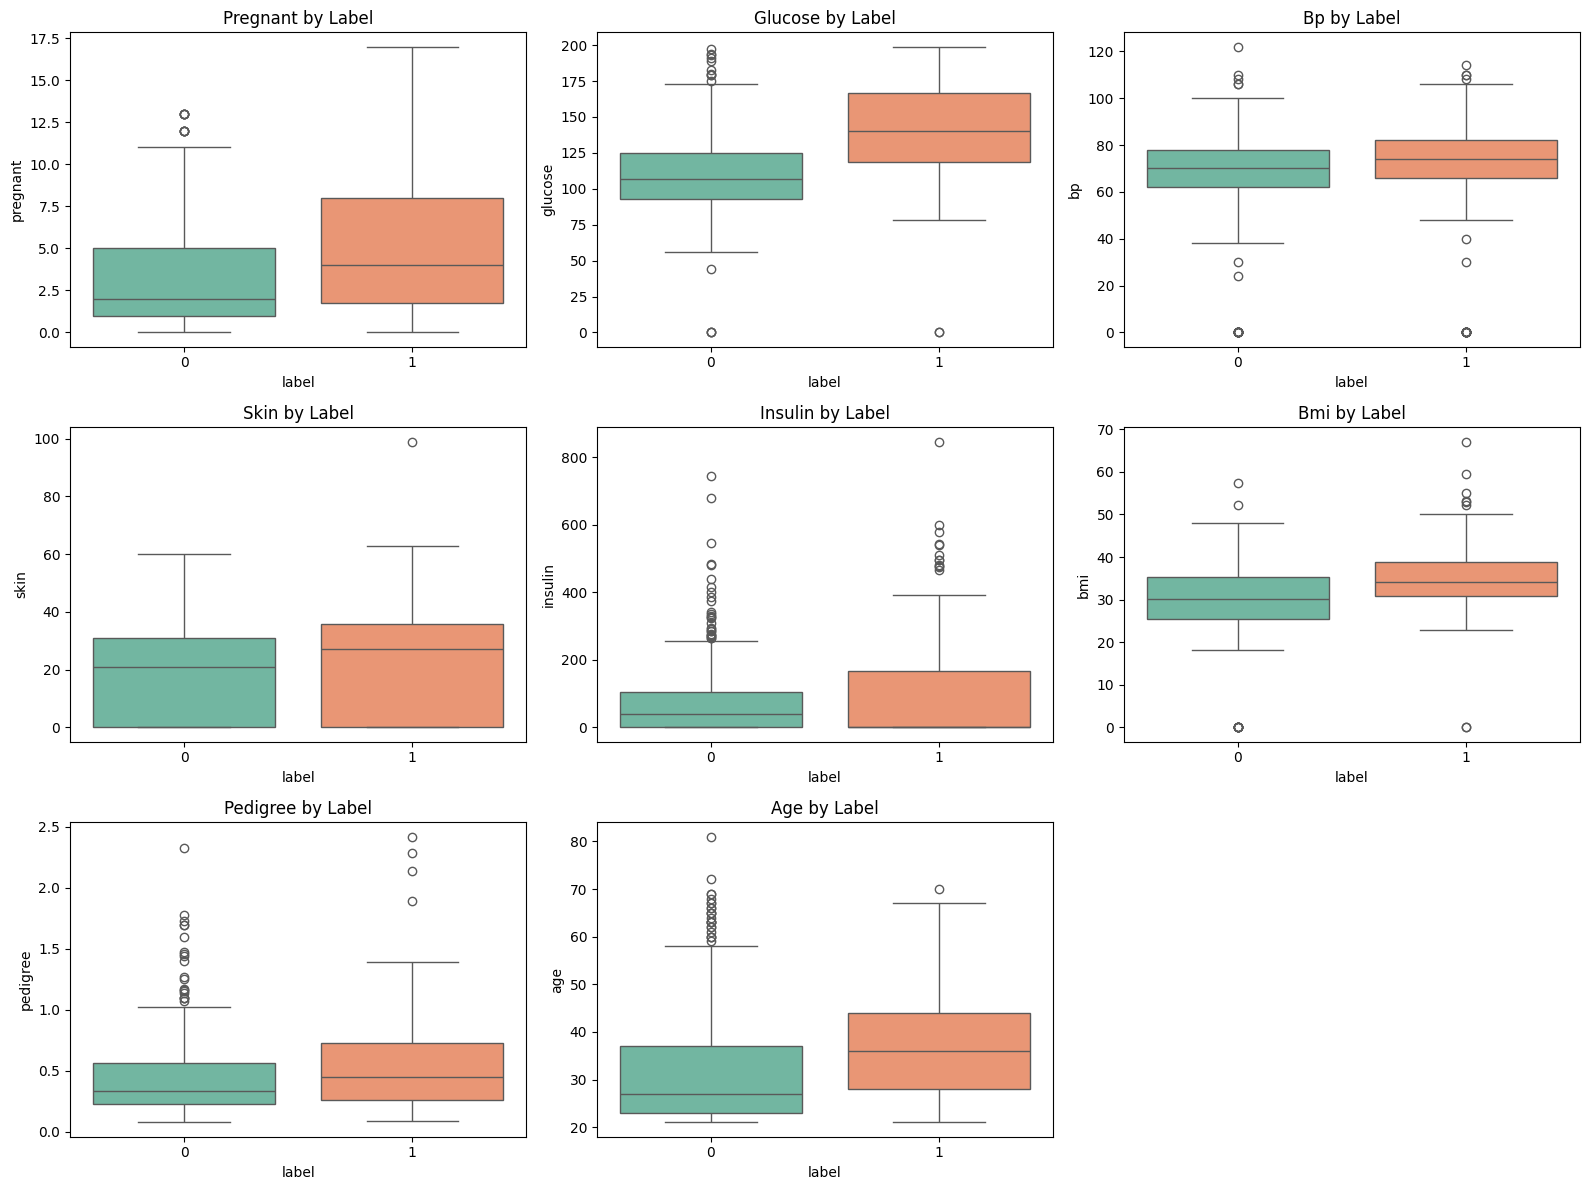

In [35]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.drop('label', axis=1).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='label', y=col, hue='label', data=df, palette='Set2', legend=False)
    plt.title(f'{col.capitalize()} by Label')
plt.tight_layout()
plt.show()
